In [29]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal

## **Question 1.1:**

In [30]:
def expectation_step(X, means, covs, pis, k):
    # """Compute the posterior probabilities of the clusters for each data point"""

    n, d = X.shape
    likelihoods = np.zeros((n, k))
    posteriors = np.zeros((n, k))

    for j in range(k):
        likelihoods[:, j] = multivariate_normal.pdf(X, mean=means[j], cov=covs[j])

    for j in range(k):
        posteriors[:, j] = pis[j] * likelihoods[:, j]

    posteriors /= np.sum(posteriors, axis=1, keepdims=True)

    return posteriors

In [31]:
def maximization_step(X, posteriors, k):
    # Update the means, covariances, and mixing coefficients for each cluster

    n, d = X.shape
    means = np.zeros((k, d))
    covs = np.zeros((k, d, d))
    pis = np.zeros(k)

    for j in range(k):
        Nj = np.sum(posteriors[:, j])
        means[j] = np.sum(X * posteriors[:, j][:, np.newaxis], axis=0) / Nj
        covs[j] = ((X - means[j]) * posteriors[:, j][:, np.newaxis]).T @ (X - means[j]) / Nj
        pis[j] = Nj / n

    return means, covs, pis

In [32]:
def EM(X, k, max_iter=300, tol=1e-6):
    """Run the EM algorithm for k-finite Gaussian mixture model"""

    n, d = X.shape
    means = np.random.rand(k, d) * np.std(X, axis=0) + np.mean(X, axis=0)
    covs = np.tile(np.diag(np.var(X, axis=0)), (k, 1, 1))
    pis = np.ones(k) / k

    for i in range(max_iter):
        prev_means = means.copy()

        posteriors = expectation_step(X, means, covs, pis, k)
        means, covs, pis = maximization_step(X, posteriors, k)

        if np.linalg.norm(means - prev_means) < tol:
            break

    return posteriors, means, covs, pis

## **Question 1.2:**

In [33]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [34]:
data = california_housing.frame

In [35]:
data

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]

In [36]:
from sklearn.decomposition import PCA
X = data[data.columns[:-1]]

pca=PCA(n_components=2)
pca.fit(X)
x=pca.transform(X)
print(x.shape)
print(x)

(20640, 2)
[[-1103.51264821     8.56663624]
 [  975.54124442    -4.67041774]
 [ -929.54990812    20.03465092]
 ...
 [ -418.43757543   -12.90825582]
 [ -684.43952537   -12.79458051]
 [  -38.43624736   -12.67037806]]


## **Questions 1.3:**

In [37]:
# Run the EM algorithm for k=2, 3, and 4
for k in range(2, 5):
    posteriors, means, covs, pis = EM(x, k)
    print(f"For k={k}:")
    for j in range(k):
        print(f" \n Component {j+1}:")
        print(f"   Mean: {means[j]}")
        print(f"   Covariance:{covs[j]}")
        print(f"   Mixing coefficient: {pis[j]} \n\n")

For k=2:
 
 Component 1:
   Mean: [1529.926222     -3.88427984]
   Covariance:[[3.67057122e+06 8.62033446e+03]
 [8.62033446e+03 1.32492407e+02]]
   Mixing coefficient: 0.16137289012825096 


 
 Component 2:
   Mean: [-294.39617826    0.74743287]
   Covariance:[[ 2.85809696e+05 -2.95210044e+02]
 [-2.95210044e+02  1.44308449e+02]]
   Mixing coefficient: 0.8386271098717493 


For k=3:
 
 Component 1:
   Mean: [-442.91905169    3.41621351]
   Covariance:[[1.74493006e+05 1.52577641e+02]
 [1.52577641e+02 1.28383995e+02]]
   Mixing coefficient: 0.6219053674714954 


 
 Component 2:
   Mean: [401.33128191  -5.62717979]
   Covariance:[[7.25280272e+05 4.14073407e+03]
 [4.14073407e+03 1.24146979e+02]]
   Mixing coefficient: 0.32669910647995504 


 
 Component 3:
   Mean: [2808.39939772   -5.56793424]
   Covariance:[[6.94555037e+06 2.01344770e+04]
 [2.01344770e+04 1.11044781e+02]]
   Mixing coefficient: 0.05139552604854957 


For k=4:
 
 Component 1:
   Mean: [-559.75821172    9.66059897]
   Covar

## **Question 1.4:**


For k=2: Silhouette Score = 0.7044753859164729

For k=3: Silhouette Score = 0.4645593815749412

For k=4: Silhouette Score = 0.15605664062773056


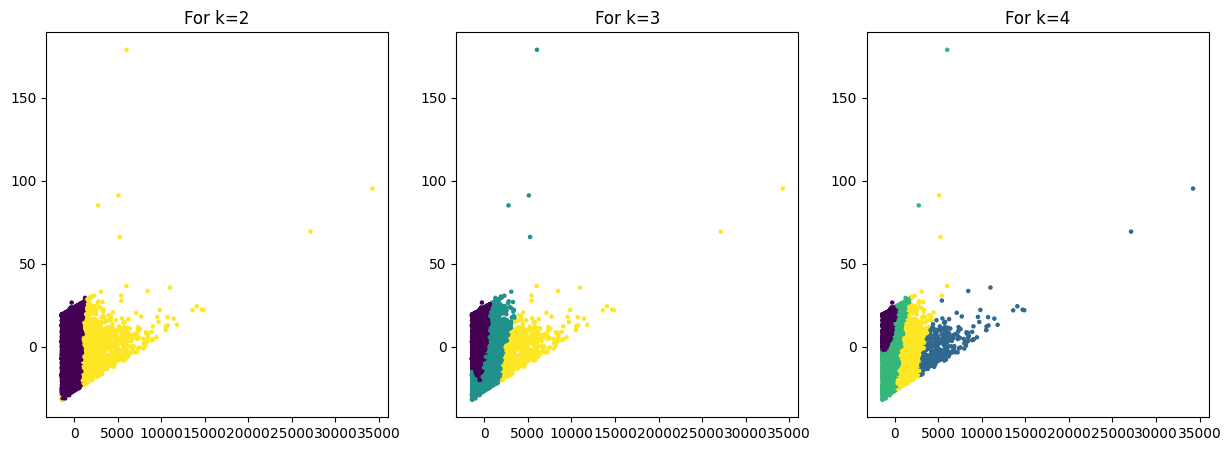

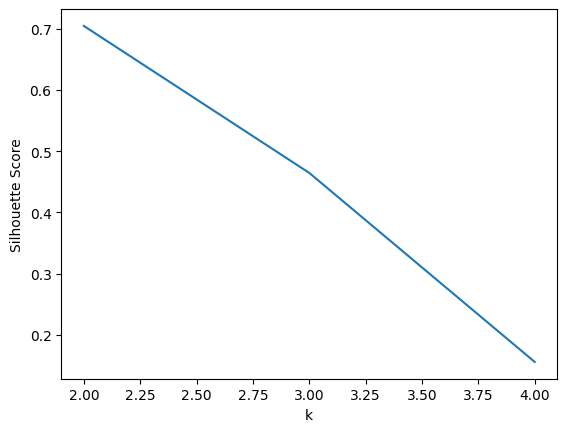

In [38]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Calculate the Silhouette Score for k=2, 3, and 4
silhouette_scores = []
for k in range(2, 5):
    posteriors, _, _, _ = EM(x, k)
    cluster_labels = posteriors.argmax(axis=1)
    score = silhouette_score(x, cluster_labels)
    silhouette_scores.append(score)
    print(f"\nFor k={k}: Silhouette Score = {score}")

# Plot the clusters for k=2, 3, and 4
plt.figure(figsize=(15, 5))
for i, k in enumerate(range(2, 5)):
    posteriors, _, _, _ = EM(x, k)
    cluster_labels = posteriors.argmax(axis=1)
    plt.subplot(1, 3, i+1)
    plt.scatter(x[:, 0], x[:, 1], c=cluster_labels, s=5, cmap='viridis')
    plt.title(f"For k={k}")
plt.show()

# Plot the Silhouette Scores
plt.plot(range(2, 5), silhouette_scores)
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()

**Implication:**
We can see that the silhoutte score for k=2 is the highest, hence we can say that for the given data, 2 clusters is the best choice and as we increase the number of clusters, the silhoutte score decreases. \
Also the separation seen in the plot for k=2 is quite perfect.